## Read .txt file

In [2]:
import numpy as np
import re
from src.utils import modif_plot
from src.utils import quickplot

In [41]:
# read SIT observations


# CroSat AWI summaries
idir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified-sea-ice-thickness-cdr-1947-2017/'
# ifile = 'NPEO_distributions_V20140415.txt'
ifile = 'NPEO_summaries_V20140415.txt'

# data from 2001 to 2010

In [42]:
with open(f'{idir}{ifile}','r') as f:
    lines = f.readlines()

In [46]:
# header = [item for item in re.split(' +', lines[0])][1:-1] + ['First']  # distributions 
header = [item for item in re.split(' +', lines[0])][1:-1] + ['SD_draft']  # summaries

In [47]:
header

['Source',
 'Mooring',
 'Index',
 'Year',
 'Yday',
 'MinDay',
 'MaxDay',
 'Month',
 'Lat',
 'Lon',
 'MinLat',
 'MaxLat',
 'MinLon',
 'MaxLon',
 'Ndays',
 'Nsamps',
 'Avg_temp',
 'Min_temp',
 'Max_temp',
 'SD_temp',
 'Avg_depth',
 'Min_depth',
 'Max_depth',
 'SD_depth',
 'Avg_draft',
 'Min_draft',
 'Max_draft',
 'SD_draft']

In [48]:
data = np.genfromtxt(f'{idir}{ifile}', delimiter='\t', dtype='U255', skip_header=1, autostrip=True)

In [49]:
data;

This type of data in the .txt file.
We get the data type from the documentation file:

In [50]:
data[0]

'NPEO   NPEO-2001   1000000   2001  110.7  100.0  120.0      4   89.56   33.65   89.56   89.56   33.65   33.65     21      5490   -999.00   -999.00   -999.00   -999.00     48.63     46.53     50.33      0.25      3.70      0.00     18.60      2.61'

In [51]:
types_data = ['U12','U12', 'int', 'int']+ ['float']*3 +['int']+ ['float']*6+ ['int', 'int']+ ['float']*12

In [25]:
# types_data = ['U12','U12', 'int', 'int']+ ['float']*3 +['int']+ ['float']*6+ ['int', 'int', 'int']+ ['float']*18  # distributions

In [52]:
# array with all the lines
arr = []
for dt in data:
    arr += [item for item in re.split(' +', dt)]

In [53]:
nlines = data.shape[0]
bb = np.array(arr).reshape(nlines, len(types_data))  # 28

In [54]:
# create dictionary from the array
dico = {}

for idx, (var, typecol) in enumerate(zip(header, types_data)):
    # format data
    if typecol == 'U12':
        typec = 'U12'
    elif typecol == 'float':
        typec = np.float64
    elif typecol == 'int':
        typec = np.int64
        
    dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)

In [57]:
dico;

In [58]:
dico['Avg_draft']*1.2

array([4.44 , 4.38 , 4.308, 3.552, 3.108, 2.928, 3.168, 3.228, 3.396,
       3.624, 3.768, 4.332, 4.368, 4.152, 4.5  , 4.26 , 4.092, 3.96 ,
       4.008, 3.984, 4.152, 4.56 , 4.644, 4.656, 4.368, 5.772, 5.124,
       4.836, 4.716, 4.104, 3.408, 4.2  , 4.416, 4.368, 4.56 , 4.572,
       5.016, 4.176, 4.92 , 4.932, 4.428, 2.76 , 2.724, 3.048, 2.688,
       2.052, 1.632, 1.38 , 1.716, 1.788, 2.124, 2.472, 2.94 , 3.072,
       3.072, 3.252, 3.12 , 2.76 , 2.424, 2.532, 2.508, 2.616, 3.06 ,
       2.988])

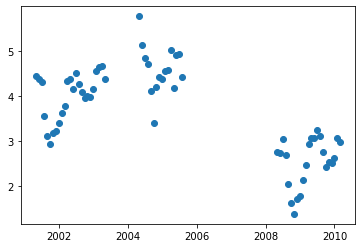

In [68]:
import matplotlib.pyplot as plt
plt.scatter(dico['Year']+dico['Month']/12., dico['Avg_draft']*1.2)

In [358]:
from importlib import reload
reload(quickplot);

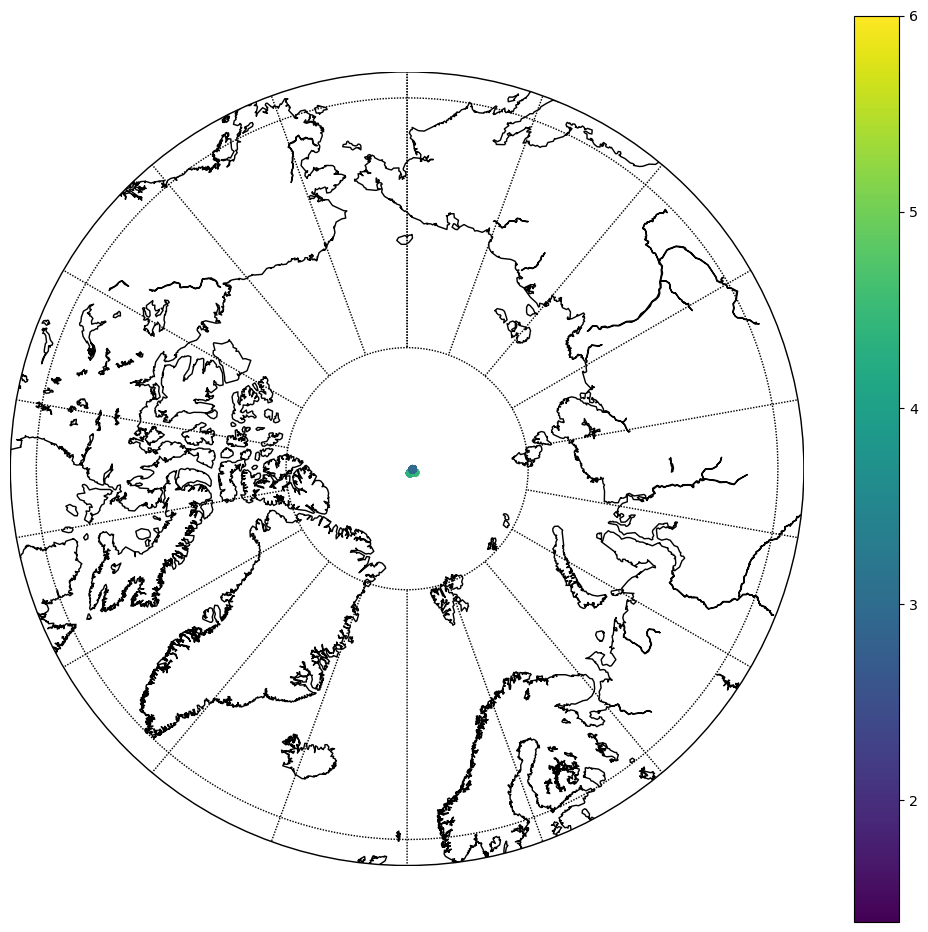

In [61]:
index = np.where((dico['Year']==2011) & (dico['Month']==12))

savefig = False
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
filename = f'CryoSat-NPEO_summaries_SIT_obs.png'
ofile = f'{odir}{filename}'

quickplot.basemap(dico['Lon'], dico['Lat'], var=dico['Avg_draft']*1.2, savefig=False, ofile=ofile, vmax=6, label='SIT (m)')


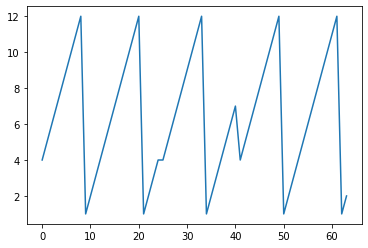

In [70]:
plt.plot(dico['Month'])

# ----------------------

## Get monthly mean

In [16]:
# dataset average monthly from 01-2010 to 12-2016 
sitmm = np.nan * np.ones(shape=(12*7))
nind = np.nan * np.ones(shape=(12*7))
i = 0

for yr in range(2010,2017):
    for m in range(1,13):
        indexes = np.where((dico['Year']==yr) & (dico['Month']==m))
        sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])
        nind[i] = len(indexes[0])
#         if nind >0: break
        i += 1



/tmp/ipykernel_130162/4129925235.py:9: RuntimeWarning: Mean of empty slice
  sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])


In [17]:
# np.where((dico['Year']==2016) & (dico['Month']==2))

In [18]:
month_labels = ['Mar','Jun','Sept','Dec']*6 + ['Mar','Jun']
year_labels = ['2010','2011','2012','2013','2014','2015','2016']

## Save dataset in a ready to use format

For now, monthly mean is sufficient:

In [19]:
# save as .npz
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
ofile = f'CryoSat-AWI_summaries_SIT_monthlymean.npy'

np.save(f'{odir}{ofile}', sitmm)


## Plot monthly mean

Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/CryoSat-AWI_summaries_SIT_monthlymean.png


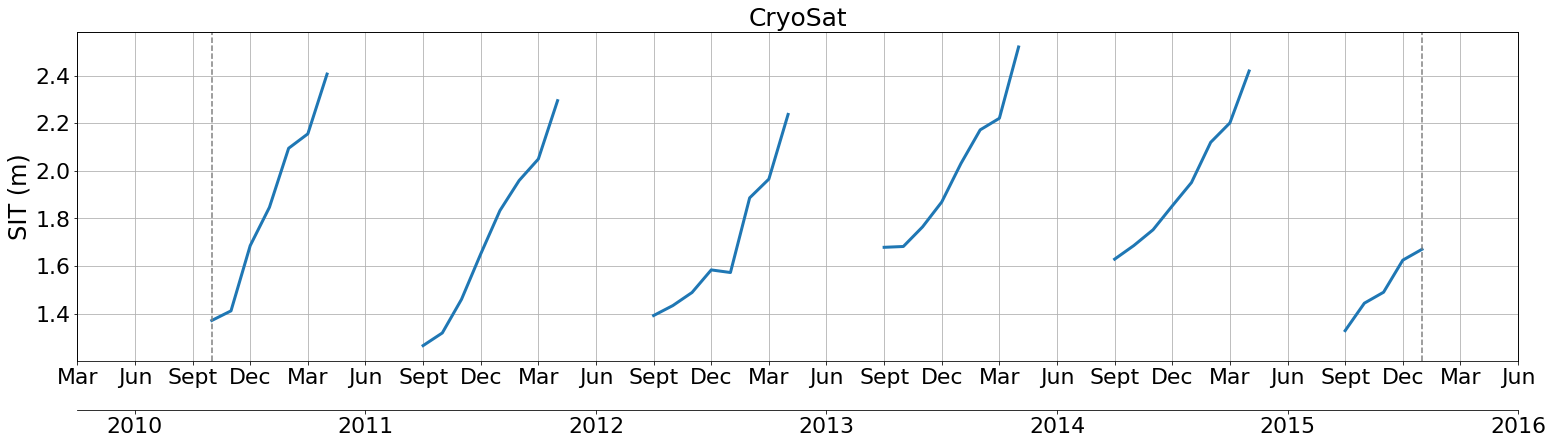

In [330]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(sitmm, lw = 3)
plt.ylabel('SIT (m)')
plt.title('CryoSat')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')


ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))
fig.tight_layout()


modif_plot.resize(fig, 22)


if True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-AWI_summaries_SIT_monthlymean.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')

Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/CryoSat-AWI_summaries_SIT_monthlyObs.png


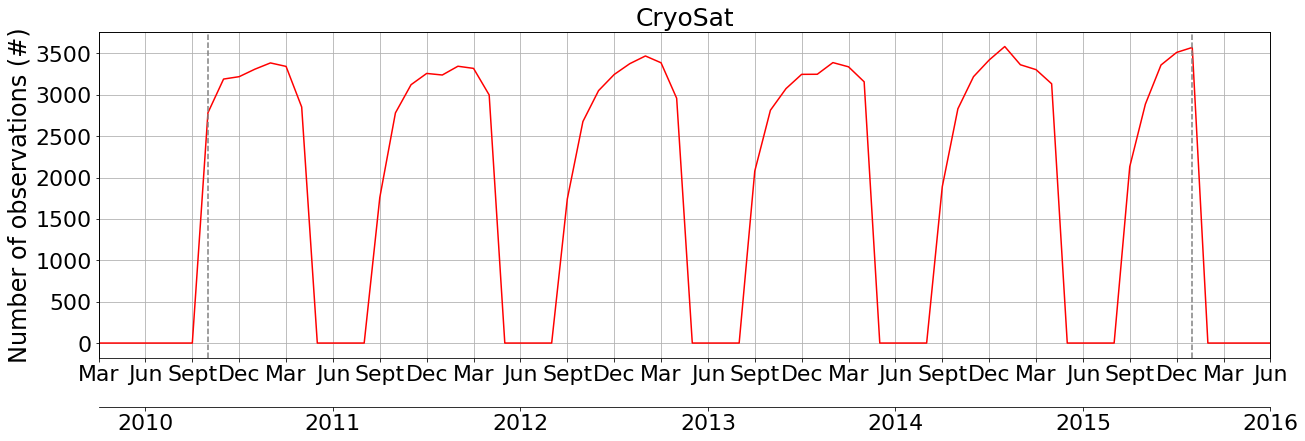

In [333]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(nind, 'r')
plt.ylabel('Number of observations (#)')
plt.title('CryoSat')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')
plt.xlim([3,78])

ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

modif_plot.resize(fig, 22)

if True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-AWI_summaries_SIT_monthlyObs.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')